In [ ]:
#Description: Sentiment analysis program that parses the tweets fetched from twitter using python

In [2]:
#Import the libraries
import tweepy
from textblob import TextBlob 
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [3]:
#Load the data 
from google.colab import files
uploaded = files.upload()


Saving Login.csv to Login.csv


In [4]:
#Get the data 
log = pd.read_csv('Login.csv')

In [5]:
#Twitter API Creds
consumerKey = log['API Key'][0]
consumerSecret = log['API Key'][1]
accessToken = log['API Key'][2]
accessTokenSecret = log['API Key'][3]
clientID = log['API Key'][4]
clientIdSecret = log['API Key'][5]



In [7]:
#Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

#Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

#Create API object while passing in the auth info
api = tweepy.API( authenticate, wait_on_rate_limit = True)




In [38]:
#Upload the tweet ids
posts = api.user_timeline(screen_name = "POTUS", count = 100, lang = "en", tweet_mode = "extended")

#Print the last 5 twees from the account
print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
  print(str(i) + ')' + tweet.full_text + '\n')
  i = i +1


Show the 5 recent tweets: 

1)RT @WhiteHouse: As a result of Putin’s ongoing assault on Ukraine, @POTUS and the leaders of the European Commission, France, Germany, Ital…

2)Judge Jackson is a nominee worthy of Justice Breyer’s legacy of excellence and decency. She’s eminently qualified and a brilliant legal mind — with the utmost character and integrity. https://t.co/JiLdImGqL0

3)For too long, our government and our courts haven’t looked like America. I believe it’s time that we have a Court that reflects the full talents and the greatness of our nation, with a nominee of extraordinary qualifications — Judge Ketanji Brown Jackson. https://t.co/3EVQaolCFE

4)Judge Jackson is the daughter of former public school teachers, a proven consensus builder, an accomplished lawyer, and a distinguished jurist. I was proud to make this call. https://t.co/R9RhwT57DR

5)Today, I met with fellow leaders from our NATO Allies and spoke with President Zelenskyy of Ukraine. The United States continues t

In [39]:
#Create a dataframe with a column called tweet
df = pd.DataFrame( [tweet.full_text for tweet in posts], columns= ['Tweets'] )

#Show the first 5 rows of data
df.head()


,Tweets
0,RT @WhiteHouse: As a result of Putin’s ongoing...
1,Judge Jackson is a nominee worthy of Justice B...
2,"For too long, our government and our courts ha..."
3,Judge Jackson is the daughter of former public...
4,"Today, I met with fellow leaders from our NATO..."


In [40]:
#Clean the text

#Create a  function to clean the tweets
def cleanText(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #Removes @ mentions
  text = re.sub(r'#', '', text) #Removing the # symbol
  text = re.sub(r'RT[\s]+', '', text) #Removing Retweet 
  text = re.sub(r'https?:\/\/\S+', '', text) # Removing links

  return text #Return cleaned text

df['Tweets'] = df['Tweets'].apply(cleanText) #Cleaning the tweets

#Show the clean tweets
df


,Tweets
0,: As a result of Putin’s ongoing assault on Uk...
1,Judge Jackson is a nominee worthy of Justice B...
2,"For too long, our government and our courts ha..."
3,Judge Jackson is the daughter of former public...
4,"Today, I met with fellow leaders from our NATO..."
...,...
95,I ran for president because I believed governm...
96,"Last year, there were 55 Fortune 500 companies..."
97,"This afternoon, the Vice President and I met w..."
98,No kid should have to spend their day worrying...


In [41]:
#Create a function to get the subjectivity 
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create function to get polarity 
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#Showing updated datafram
df

,Tweets,Subjectivity,Polarity
0,: As a result of Putin’s ongoing assault on Uk...,0.000000,0.000000
1,Judge Jackson is a nominee worthy of Justice B...,0.733333,0.477778
2,"For too long, our government and our courts ha...",0.650000,0.211111
3,Judge Jackson is the daughter of former public...,0.391667,0.250000
4,"Today, I met with fellow leaders from our NATO...",0.325000,0.025000
...,...,...,...
95,I ran for president because I believed governm...,0.500000,0.300000
96,"Last year, there were 55 Fortune 500 companies...",0.511640,0.132540
97,"This afternoon, the Vice President and I met w...",0.933333,0.311111
98,No kid should have to spend their day worrying...,0.604167,0.187500


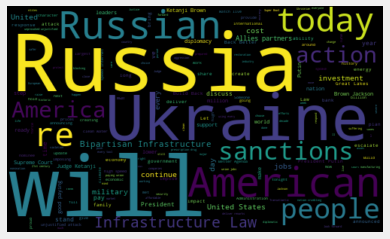

In [42]:
#Word Cloud plotting
allWords = ' '.join( [twts for twts in df['Tweets'] ] )
wordCloud = WordCloud(width =500, height = 300, random_state = 21, max_font_size = 110).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()


In [43]:
#Create a function to get the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

#Show dattaframe with analysis
df

,Tweets,Subjectivity,Polarity,Analysis
0,: As a result of Putin’s ongoing assault on Uk...,0.000000,0.000000,Neutral
1,Judge Jackson is a nominee worthy of Justice B...,0.733333,0.477778,Positive
2,"For too long, our government and our courts ha...",0.650000,0.211111,Positive
3,Judge Jackson is the daughter of former public...,0.391667,0.250000,Positive
4,"Today, I met with fellow leaders from our NATO...",0.325000,0.025000,Positive
...,...,...,...,...
95,I ran for president because I believed governm...,0.500000,0.300000,Positive
96,"Last year, there were 55 Fortune 500 companies...",0.511640,0.132540,Positive
97,"This afternoon, the Vice President and I met w...",0.933333,0.311111,Positive
98,No kid should have to spend their day worrying...,0.604167,0.187500,Positive


In [44]:
#Print all of the positive tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ')' + sortedDF['Tweets'][i])
    print()
    j=j+1


1)Judge Jackson is a nominee worthy of Justice Breyer’s legacy of excellence and decency. She’s eminently qualified and a brilliant legal mind — with the utmost character and integrity. 

2)For too long, our government and our courts haven’t looked like America. I believe it’s time that we have a Court that reflects the full talents and the greatness of our nation, with a nominee of extraordinary qualifications — Judge Ketanji Brown Jackson. 

3)Judge Jackson is the daughter of former public school teachers, a proven consensus builder, an accomplished lawyer, and a distinguished jurist. I was proud to make this call. 

4)Today, I met with fellow leaders from our NATO Allies and spoke with President Zelenskyy of Ukraine. The United States continues to provide economic, humanitarian, and security support–and we continue to rally other countries to provide similar assistance. 

5)I have admired these traits: pragmatism, historical perspective, wisdom, and character in jurists nominated by

In [45]:
#Print the negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending = 'False')
sortedDF = df.reset_index(drop =True)
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ')' + sortedDF['Tweets'][i])
    print()
    j = j+1



1)Today, I authorized a new round of sanctions and limitations in response to Putin’s war of choice against Ukraine.
 
We have purposefully designed these sanctions to maximize the long-term impact on Russia – and to minimize the impact on the United States. 

2)My Administration is using every tool at our disposal to protect Americans and businesses from rising prices at the pump. 

We are taking active steps to bring down the costs — and American oil and gas companies should not exploit this moment to hike prices just to raise profits.

3)We have been transparent with the world — we shared declassified intelligence about Russia’s plans and cyber attacks and false pretexts — so that there can be no confusion or cover up.
 
Putin is the aggressor. Putin chose this war. 

4)This morning, I met with my G7 counterparts to discuss President Putin’s unjustified attack on Ukraine and we agreed to move forward on devastating packages of sanctions and other economic measures to hold Russia to 

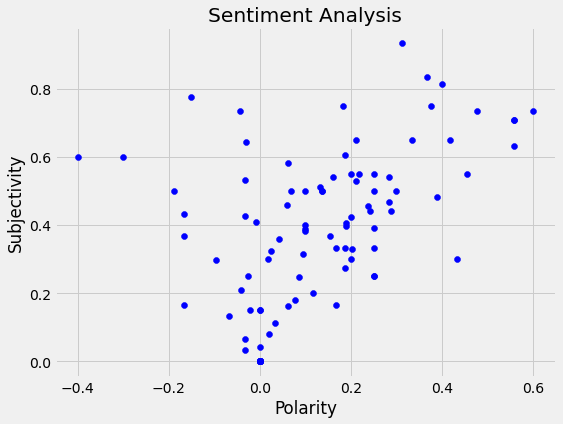

In [46]:
#Plot the polarity and subjectivity 
plt.figure(figsize = (8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Blue')


plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [47]:
#Get the percentage of positive tweets 
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

print('Percentage of positive tweets')
round((ptweets.shape[0] / df.shape[0]) *100, 1)


Percentage of positive tweets


63.0

In [48]:
#Get the percentage of negative tweets
negtweets = df[df.Analysis == 'Negative']
negtweets = negtweets['Tweets']

print('Percentage of negative tweets')
round( (negtweets.shape[0] / df.shape[0]) *100, 1)

Percentage of negative tweets


19.0

In [49]:
#Get the percentage of neutral tweets
ntweets = df[df.Analysis == 'Neutral']
ntweets = ntweets['Tweets']

print('Percentage of neutral tweets')
round( (ntweets.shape[0] / df.shape[0]) *100, 1)

Percentage of neutral tweets


18.0

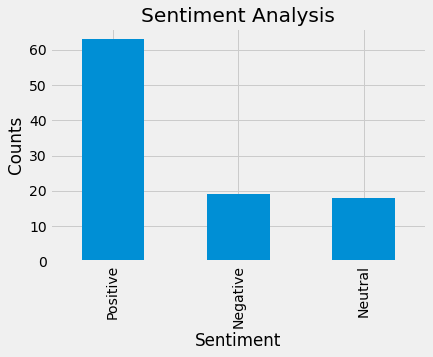

In [50]:
#Show the value counts

df['Analysis'].value_counts()

#plot and visualize the counts 
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')

df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()
